#### Performing Convolution using Scipy

In [1]:
from scipy.signal import convolve2d
import numpy as np

In [2]:

A = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
B = np.array([[0,1],[1,0]])

x = convolve2d(A, B, mode='valid')
x


array([[0, 1, 0],
       [1, 0, 1],
       [0, 1, 0]])

#### Convolution without overlapping

In [3]:
output = np.zeros((2,2))

for i in range(0, 4,2):
    for j in range(0, 4,2):
        region = A[i:i+2, j:j+2]
        output[i//2, j//2] = np.sum(region * B)

output

array([[0., 0.],
       [0., 0.]])

In [4]:
def conv_without_overlap(x, y, stride):
    kernel_size = y.shape[0]
    out_rows = x.shape[0]//stride
    out_cols = x.shape[1]//stride
    o = np.zeros((out_rows, out_cols))

    for a in range(0, x.shape[0] - kernel_size + 1, stride):
        for b in range(0, x.shape[1] - kernel_size + 1, stride):
            r = x[a:a+kernel_size, b:b+kernel_size]
            o[a//stride, b//stride] = np.sum(r * y)
    return o

#### Defining a Pooling functions
- Max Pooling
- Average Pooling

In [5]:
def max_pool(l, stride = 2):
    out_rows = l.shape[0]//stride
    out_cols = l.shape[1]//stride
    o = np.zeros((out_rows, out_cols))

    for a in range(0, l.shape[0], stride):
        for b in range(0, l.shape[0], stride):
            r = l[a:a+stride, b:b+stride]
            o[a//stride, b//stride] = np.max(r)
    return o

In [6]:
def avg_pool(l, stride = 2):
    out_rows = l.shape[0]//stride
    out_cols = l.shape[1]//stride
    o = np.zeros((out_rows, out_cols))

    for a in range(0, l.shape[0], stride):
        for b in range(0, l.shape[0], stride):
            r = l[a:a+stride, b:b+stride]
            o[a//stride, b//stride] = np.mean(r)
    return o

#### some functions
- ReLU - Rectified Linear Unit function

In [8]:
def relu(a):
    return max(0,a)
def sigmoid(a):
    return 1/(1+np.exp(-a))
def softmax(a):
    return np.exp(a) / np.sum(np.exp(a))
def tanh(a):
    return np.tanh(a)

def activate_relu_on_mat(l):
    out_rows = l.shape[0]
    out_cols = l.shape[1]
    o = np.zeros((out_rows, out_cols))

    for a in range(0, l.shape[0]):
        for b in range(0, l.shape[1]):
            o[a,b] = relu(l[a,b])
    return o

def activate_sigmoid_on_mat(l):
    out_rows = l.shape[0]
    out_cols = l.shape[1]
    o = np.zeros((out_rows, out_cols))
    for a in range(0, l.shape[0]):
        for b in range(0, l.shape[1]):
            o[a,b] = sigmoid(l[a,b])
    return o

In [9]:
A = np.array([[1,0,0,0,0,0],
              [0,1,0,0,0,0],
              [0,0,1,0,0,0],
              [0,0,0,1,0,0],
              [0,0,0,0,1,0],
              [0,0,0,0,0,1]])
B = np.array([[0,0,1],
              [0,1,0],
              [1,0,0]])

print(conv_without_overlap(A, B, 3))
print(avg_pool(A, 3))

[[1. 0.]
 [0. 1.]]
[[0.33333333 0.        ]
 [0.         0.33333333]]


#### Trying the functions on an Image

In [10]:
import cv2

img = cv2.imread('3b8648d6-1e5d-4da6-97d3-0f8b519f59d9_ebcb8037-d98b-49e7-926f-74bbe573d577_wp1852558-koenigsegg-agera-r-wallpapers.jpg_2k.jpeg_2k.jpeg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb.shape


(3240, 5760, 3)

In [11]:
red = rgb[:,:,0]
green = rgb[:,:,1]
blue = rgb[:,:,2]

gray = 0.299*red + 0.587*green + 0.114*blue


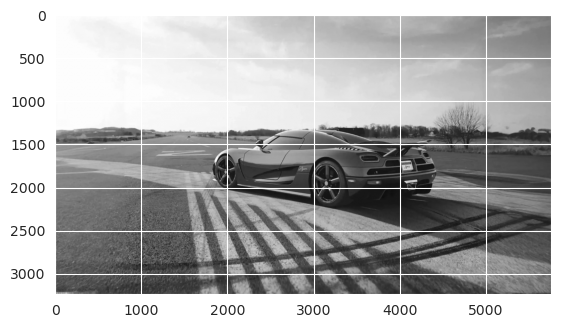

In [12]:
import matplotlib.pyplot as plt
import numpy as np
gray = np.uint8(gray)

plt.imshow(gray, cmap='gray')
plt.show()

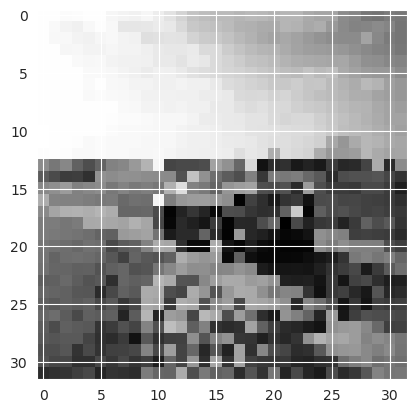

In [13]:
resized_gray_image = cv2.resize(gray, (32,32))
plt.imshow(resized_gray_image, cmap='gray')
plt.show()

In [14]:
normalized_gray_image = resized_gray_image / 255.0
print(normalized_gray_image.min(), normalized_gray_image.max())

0.06666666666666667 0.996078431372549


#### Performing first convolution on the Normalized image

In [15]:
from scipy.signal import convolve2d

f = np.array([[1,1,0],[0,0,1],[1,0,0]])
res = convolve2d(normalized_gray_image, f, mode='valid')

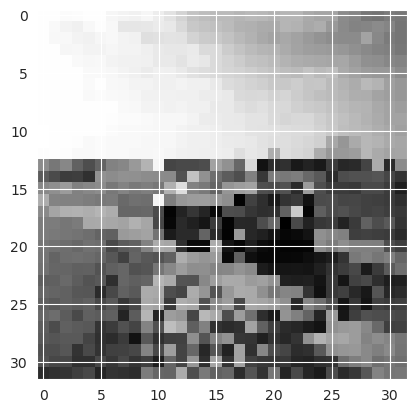

In [16]:
plt.imshow(resized_gray_image, cmap='gray')
plt.show()

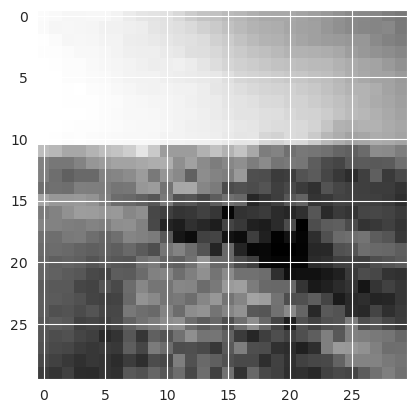

In [17]:
plt.imshow(res, cmap='gray')
plt.show()

In [18]:
activated_output = activate_sigmoid_on_mat(res)
activated_output

array([[0.98034945, 0.97973588, 0.97894249, 0.97894249, 0.97934292,
        0.97934292, 0.97828596, 0.97554769, 0.97330129, 0.97289063,
        0.97194406, 0.96819119, 0.96270833, 0.95871514, 0.95664945,
        0.95275098, 0.9500313 , 0.94496285, 0.94051953, 0.94007924,
        0.93963591, 0.93667865, 0.93161491, 0.92617814, 0.91860403,
        0.91064766, 0.9090393 , 0.90507253, 0.89484137, 0.88917611],
       [0.98004498, 0.9788615 , 0.97918365, 0.97894249, 0.97861669,
        0.97760944, 0.97760944, 0.97691233, 0.97628501, 0.97360531,
        0.97215715, 0.97118573, 0.96902582, 0.96516137, 0.96156552,
        0.95681179, 0.95275098, 0.94813646, 0.94496285, 0.94351762,
        0.93851411, 0.9347922 , 0.93285357, 0.92509844, 0.91801567,
        0.91160032, 0.90740493, 0.90540892, 0.90871452, 0.88994663],
       [0.98101797, 0.98034945, 0.97902318, 0.97934292, 0.97894249,
        0.97803464, 0.97803464, 0.97628501, 0.97573409, 0.97498009,
        0.97380612, 0.97247383, 0.9717294 , 0.

In [19]:
max_pooled_1_res = max_pool(activated_output)
max_pooled_1_res.shape

(15, 15)

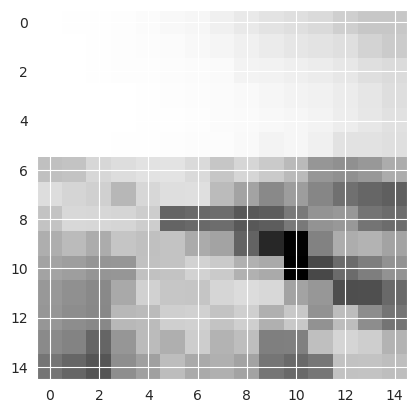

In [20]:
plt.imshow(max_pooled_1_res, cmap='gray')
plt.show()

##### 2nd layer

In [21]:
f2 = np.array([[1,0,1],[0,1,0],[1,0,0]])
res2 = convolve2d(max_pooled_1_res, f2, mode='valid')


In [22]:
activated_output2 = activate_sigmoid_on_mat(res2)
activated_output2.shape

(13, 13)

###### padding

In [23]:
import numpy as np

def pad_to_even(l):
    rows, cols = l.shape
    padded_matrix = np.pad(l, ((0, rows % 2), (0, cols % 2)), mode='constant')
    return padded_matrix


In [24]:
activated_output2_new = activated_output2.copy()

activated_output2_new = pad_to_even(activated_output2_new)
activated_output2_new.shape



(14, 14)

In [26]:
max_pool_2_res = max_pool(activated_output2_new)
max_pool_2_res.shape

(7, 7)

In [27]:
max_pool_2_res_new = pad_to_even(max_pool_2_res)
max_pool_2_res_new.shape

(8, 8)